In [15]:
%matplotlib inline
import os
import sys
from os.path import dirname
parent_dir = dirname(dirname(os.getcwd()))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','2_hillslope_discharge'))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','3_channel_routing'))

from vadoseZone import LaioVadoseZone, PorporatoVadoseZone
from groundwaterZone import GroundwaterZone, NonlinearReservoir
from REW import REW
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [36]:
## time domain
Tmax    = 365*10.               # days (or whatever)
dt      = 1/24.               
t       = np.linspace(0,Tmax,np.ceil(Tmax/dt))

## rainfall statistics
alpha       = 2.5               # [cm / event]
L           = 10/30.            # [events / day]

rainfall = np.array([np.random.exponential(alpha) if np.random.uniform() > np.exp(-L*dt) else 0.0 for i in range(len(t))])

In [37]:
params = {'n': 0.29, 'storage': 0, 'discharge': 0, 'groundwater': 0, 'emax': 0.5, 'b': 3, 'leakage': 0, 'a': 0.0001064, 'sfc': 0.51, 'sw': 0.3, 'zr': 76.4, 'ET': 0}

vz = PorporatoVadoseZone(**params)
gz = NonlinearReservoir(**params)

rew = REW(vz,gz,**{'ppt':rainfall})

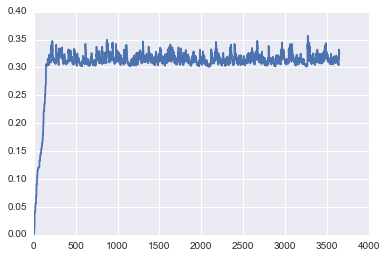

In [38]:
vzStorage   = np.zeros(np.size(t))
gzStorage   = np.zeros(np.size(t))

for i in range(len(rainfall)):
    vzFluxes = rew.vz.update(dt,**{'ppt':rew.ppt[i]})

    vzStorage[i]    = rew.vz.storage/params['n']/params['zr'] # [cm]
    
plt.plot(t,vzStorage)

(array([  1.48000000e+02,   3.96000000e+02,   5.41000000e+02,
          7.50000000e+02,   1.06700000e+03,   1.22200000e+03,
          1.52900000e+03,   1.78600000e+03,   1.91400000e+03,
          2.04400000e+03,   2.27300000e+03,   2.38400000e+03,
          2.39700000e+03,   2.51600000e+03,   2.53100000e+03,
          2.57800000e+03,   2.63700000e+03,   2.65900000e+03,
          2.64000000e+03,   2.58700000e+03,   2.47400000e+03,
          2.42500000e+03,   2.35900000e+03,   2.25200000e+03,
          2.24900000e+03,   2.13500000e+03,   2.05000000e+03,
          1.88900000e+03,   1.78900000e+03,   1.64100000e+03,
          1.49000000e+03,   1.43000000e+03,   1.32000000e+03,
          1.19300000e+03,   1.09700000e+03,   1.02200000e+03,
          9.60000000e+02,   9.51000000e+02,   8.62000000e+02,
          7.96000000e+02,   7.47000000e+02,   6.77000000e+02,
          6.40000000e+02,   5.84000000e+02,   5.88000000e+02,
          5.50000000e+02,   4.90000000e+02,   4.51000000e+02,
        

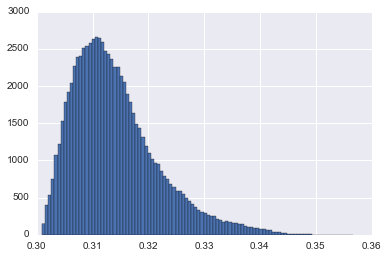

In [46]:
plt.hist(vzStorage[24*365:],100)